<a href="https://colab.research.google.com/github/markusstrasser/deforum/blob/main/Deforum_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deforum Stable Diffusion v0.5**
[Stable Diffusion](https://github.com/CompVis/stable-diffusion) by Robin Rombach, Andreas Blattmann, Dominik Lorenz, Patrick Esser, Björn Ommer and the [Stability.ai](https://stability.ai/) Team. [K Diffusion](https://github.com/crowsonkb/k-diffusion) by [Katherine Crowson](https://twitter.com/RiversHaveWings). You need to get the ckpt file and put it on your Google Drive first to use this. It can be downloaded from [HuggingFace](https://huggingface.co/CompVis/stable-diffusion).

Notebook by [deforum](https://discord.gg/upmXXsrwZc)

By using this Notebook, you agree to the following Terms of Use, and license:

**Stablity.AI Model Terms of Use**

This model is open access and available to all, with a CreativeML OpenRAIL-M license further specifying rights and usage.

The CreativeML OpenRAIL License specifies:

You can't use the model to deliberately produce nor share illegal or harmful outputs or content
CompVis claims no rights on the outputs you generate, you are free to use them and are accountable for their use which must not go against the provisions set in the license
You may re-distribute the weights and use the model commercially and/or as a service. If you do, please be aware you have to include the same use restrictions as the ones in the license and share a copy of the CreativeML OpenRAIL-M to all your users (please read the license entirely and carefully)


Please read the full license here: https://huggingface.co/spaces/CompVis/stable-diffusion-license

# Setup

In [10]:
SETUP = True

if SETUP:
    !python setup.py


NVIDIA RTX A4000, 16376 MiB, 12620 MiB

Local Path Variables:

models_path: /content/models
output_path: /content/output
Setting up environment...
Cloning into 'stable-diffusion'...
remote: Enumerating objects: 1369, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1369 (delta 12), reused 21 (delta 12), pack-reused 1344
Receiving objects: 100% (1369/1369), 70.16 MiB | 41.50 MiB/s, done.
Resolving deltas: 100% (737/737), done.
Cloning into 'AdaBins'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Receiving objects: 100% (80/80), 558.94 KiB | 3.02 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Cloning into 'MiDaS'...
remote: Enumerating objects: 501, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 501 (delta 69), reused 46 (delta 44), pack-reused 409
Receiving objects: 100% (501/501), 414.88 KiB |

In [15]:
# !pip install gdown
# !gdown https://drive.google.com/uc?id=1N06uaEC-5c1ciC_CVwqfhD-IPbOtCVOa
#!mkdir ../models
# !mv sd-v1-4-full-ema.ckpt ../models/model.ckpt
#@markdown **Model and Output Paths**
# ask for the link
# !mkdir /content/models
# !mkdir /content/output

mkdir: cannot create directory ‘/content/models’: File exists
mkdir: cannot create directory ‘/content/output’: File exists


# Settings

### Animation Settings

### Prompts
`animation_mode: None` batches on list of *prompts*. `animation_mode: 2D` uses *animation_prompts* key frame sequence

In [48]:

prompts = [
    "a beautiful forest by Asher Brown Durand, trending on Artstation", # the first prompt I want
    "a beautiful portrait of a woman by Artgerm, trending on Artstation", # the second prompt I want
    #"this prompt I don't want it I commented it out",
    #"a nousr robot, trending on Artstation", # use "nousr robot" with the robot diffusion model (see model_checkpoint setting)
    #"touhou 1girl komeiji_koishi portrait, green hair", # waifu diffusion prompts can use danbooru tag groups (see model_checkpoint)
    #"this prompt has weights if prompt weighting enabled:2 can also do negative:-2", # (see prompt_weighting)
]

animation_prompts = {
    0: "a beautiful apple, trending on Artstation",
    20: "a beautiful banana, trending on Artstation",
    30: "a beautiful coconut, trending on Artstation",
    40: "a beautiful durian, trending on Artstation",
}

In [20]:
#!pip install opencv-python

In [30]:
import gc, torch
# clean up unused memory
gc.collect()
torch.cuda.empty_cache()


# Run

In [32]:
!mkdir ../configs

In [61]:
%load_ext autoreload
%autoreload 2
from deforum import render_input_video, render_animation, render_interpolation, render_image_batch, DeforumArgs, DeforumAnimArgs


Local Path Variables:

models_path: /content/models
output_path: /content/output
Using config: ./stable-diffusion/configs/stable-diffusion/v1-inference.yaml
../models/sd-v1-4-full-ema.ckpt exists
Using ckpt: ../models/sd-v1-4-full-ema.ckpt
Loading model from ../models/sd-v1-4-full-ema.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.17.mlp.fc2.weight', 'vision_model.encoder.layers.16.self_attn.q_proj.bias', 'vision_model.encoder.layers.20.self_attn.out_proj.bias', 'vision_model.encoder.layers.22.layer_norm2.weight', 'vision_model.encoder.layers.13.self_attn.v_proj.bias', 'vision_model.encoder.layers.19.self_attn.out_proj.weight', 'vision_model.encoder.layers.5.self_attn.q_proj.weight', 'vision_model.encoder.layers.9.self_attn.out_proj.bias', 'vision_model.encoder.layers.20.self_attn.k_proj.bias', 'text_projection.weight', 'vision_model.encoder.layers.0.self_attn.k_proj.bias', 'vision_model.encoder.layers.1.self_attn.out_proj.bias', 'vision_model.encoder.layers.8.mlp.fc1.bias', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.encoder.layers.17.self_attn.v_proj.bias', 'vision_model.encoder.layers.12.mlp.fc1.weight', 'vision_model.encoder.layers.15.layer_norm2.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
pip install numexpr

     |████████████████████████████████| 381 kB 22.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


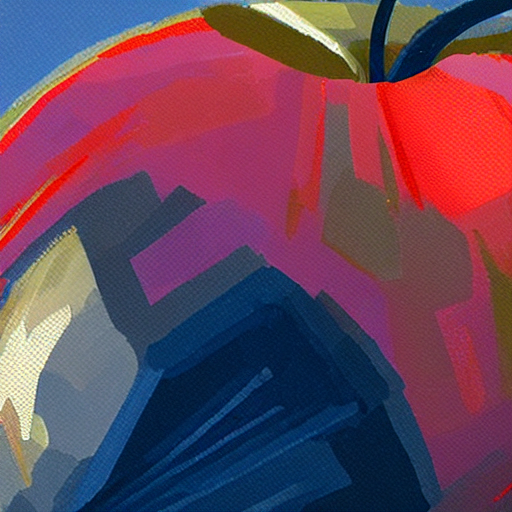

Global seed set to 9395235


Rendering animation frame 26 of 1000
a beautiful apple, trending on Artstation 9395235
Angle: 0.0 Zoom: 1.04
Tx: -5.810650555703242 Ty: 0.0 Tz: 10.0
Rx: 0.0 Ry: 0.0 Rz: 0.0


  0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:

import os
from types import SimpleNamespace
import time, random, json
#@markdown **Load Settings**
override_settings_with_file = True #@param {type:"boolean"}
custom_settings_file = "../configs/current.txt"#@param {type:"string"}

args_dict = DeforumArgs()
anim_args_dict = DeforumAnimArgs()

if override_settings_with_file:
    print(f"reading custom settings from {custom_settings_file}")
    if not os.path.isfile(custom_settings_file):
        print('The custom settings file does not exist. The in-notebook settings will be used instead')
    else:
        with open(custom_settings_file, "r") as f:
            jdata = json.loads(f.read())
            animation_prompts = jdata["prompts"]
            args.prompts = animation_prompts
            for i, k in enumerate(args_dict):
                if k in jdata:
                    args_dict[k] = jdata[k]
                else:
                    print(f"key {k} doesn't exist in the custom settings data! using the default value of {args_dict[k]}")
            for i, k in enumerate(anim_args_dict):
                if k in jdata:
                    anim_args_dict[k] = jdata[k]
                else:
                    print(f"key {k} doesn't exist in the custom settings data! using the default value of {anim_args_dict[k]}")
            print(args_dict)
            print(anim_args_dict)

            
print("animaattttt", animation_prompts, args)
args = SimpleNamespace(**args_dict)
anim_args = SimpleNamespace(**anim_args_dict)

args.timestring = time.strftime('%Y%m%d%H%M%S')
args.strength = max(0.0, min(1.0, args.strength))

if args.seed == -1:
    args.seed = random.randint(0, 2**32 - 1)
if not args.use_init:
    args.init_image = None
if args.sampler == 'plms' and (args.use_init or anim_args.animation_mode != 'None'):
    print(f"Init images aren't supported with PLMS yet, switching to KLMS")
    args.sampler = 'klms'
if args.sampler != 'ddim':
    args.ddim_eta = 0

if anim_args.animation_mode == 'None':
    anim_args.max_frames = 1
elif anim_args.animation_mode == 'Video Input':
    args.use_init = True

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

# dispatch to appropriate renderer
if anim_args.animation_mode == '2D' or anim_args.animation_mode == '3D':
    render_animation(args, anim_args, animation_prompts)
elif anim_args.animation_mode == 'Video Input':
    render_input_video(args, anim_args, animation_prompts)
elif anim_args.animation_mode == 'Interpolation':
    render_interpolation(args, anim_args, animation_prompts)
else:
    render_image_batch(args)    

# Create video from frames

In [ ]:
skip_video_for_run_all = True #@param {type: 'boolean'}
fps = 12 #@param {type:"number"}
#@markdown **Manual Settings**
use_manual_settings = False #@param {type:"boolean"}
image_path = "/content/drive/MyDrive/AI/StableDiffusion/2022-09/20220903000939_%05d.png" #@param {type:"string"}
mp4_path = "/content/drive/MyDrive/AI/StableDiffu'/content/drive/MyDrive/AI/StableDiffusion/2022-09/sion/2022-09/20220903000939.mp4" #@param {type:"string"}
render_steps = True  #@param {type: 'boolean'}
path_name_modifier = "x0_pred" #@param ["x0_pred","x"]


if skip_video_for_run_all == True:
    print('Skipping video creation, uncheck skip_video_for_run_all if you want to run it')
else:
    import os
    import subprocess
    from base64 import b64encode

    print(f"{image_path} -> {mp4_path}")

    if use_manual_settings:
        max_frames = "200" #@param {type:"string"}
    else:
        if render_steps: # render steps from a single image
            fname = f"{path_name_modifier}_%05d.png"
            all_step_dirs = [os.path.join(args.outdir, d) for d in os.listdir(args.outdir) if os.path.isdir(os.path.join(args.outdir,d))]
            newest_dir = max(all_step_dirs, key=os.path.getmtime)
            image_path = os.path.join(newest_dir, fname)
            print(f"Reading images from {image_path}")
            mp4_path = os.path.join(newest_dir, f"{args.timestring}_{path_name_modifier}.mp4")
            max_frames = str(args.steps)
        else: # render images for a video
            image_path = os.path.join(args.outdir, f"{args.timestring}_%05d.png")
            mp4_path = os.path.join(args.outdir, f"{args.timestring}.mp4")
            max_frames = str(anim_args.max_frames)

    # make video
    cmd = [
        'ffmpeg',
        '-y',
        '-vcodec', 'png',
        '-r', str(fps),
        '-start_number', str(0),
        '-i', image_path,
        '-frames:v', max_frames,
        '-c:v', 'libx264',
        '-vf',
        f'fps={fps}',
        '-pix_fmt', 'yuv420p',
        '-crf', '17',
        '-preset', 'veryfast',
        '-pattern_type', 'sequence',
        mp4_path
    ]
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        print(stderr)
        raise RuntimeError(stderr)

    mp4 = open(mp4_path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display.display( display.HTML(f'<video controls loop><source src="{data_url}" type="video/mp4"></video>') )